In [67]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

Z_MASS = 91.2


# donotdelete = []
print(sys.version)

3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [108]:
fpath =OrderedDict()
tree = OrderedDict()
NEvents = {}



path = '/storage/cms/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v1/v117/normalized/' #segment
path = '/storage/cms/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v1/v116/normalized/' #hit

fpath['qcd'] = path +'QCD_HT1000to1500_TuneCP5_13TeV-madgraphMLM-pythia8_137000pb_weighted.root'

# fpath['qcd'] = path +'QCD_HT700to1000_TuneCP5_13TeV-madgraphMLM-pythia8_137000pb_weighted.root'

fpath['signal'] = path + 'ggH_HToSSTobbbb_MH-125_MS-15_ctau-1000_TuneCP5_13TeV-powheg-pythia8_137000pb_weighted.root'



for k,v in fpath.items():
    print(k)
    root_dir = uproot.open(v) 

    tree[k] = root_dir['MuonSystem']
    NEvents[k] = root_dir['NEvents'][1]
    a = tree[k]["weight"].array()


qcd
signal


# load variables

In [109]:
start_t = time.time()
nCsc = {}
weight = {}
for k,T in tree.items():
    
    print(k)
    
    if '117' in path:
        sel_cluster = np.logical_and(T.array('cscSegClusterJetVetoPt')<10, T.array('cscSegClusterMuonVetoPt')<20)
        sel_cluster = np.logical_and(sel_cluster, T.array('cscSegClusterTimeTotal')<12.5)
        sel_cluster = np.logical_and(sel_cluster, T.array('cscSegClusterTimeTotal')>-5)
        sel_ev = sel_cluster.sum()>0
    else:
        sel_cluster = np.logical_and(T.array('cscRechitCluster3JetVetoPt')<10, T.array('cscRechitCluster3MuonVetoPt')<20)
        sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster3TimeTotal')<12.5)
        sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster3TimeTotal')>-5)



        sel_ev = sel_cluster.sum()>0

    ##### clusters #####
    if '117' in path: nCsc[k] = T.array('cscSegClusterSize')[sel_cluster][sel_ev][:,0]
    else: nCsc[k] = T.array('cscRechitCluster3Size')[sel_cluster][sel_ev][:,0]

    weight[k] = T.array('weight') [sel_ev]



qcd
signal


# 1D histogram

qcd 0.0029845585 0.00014272273
signal 0.50984 0.0067891167
0.018943071365356445


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


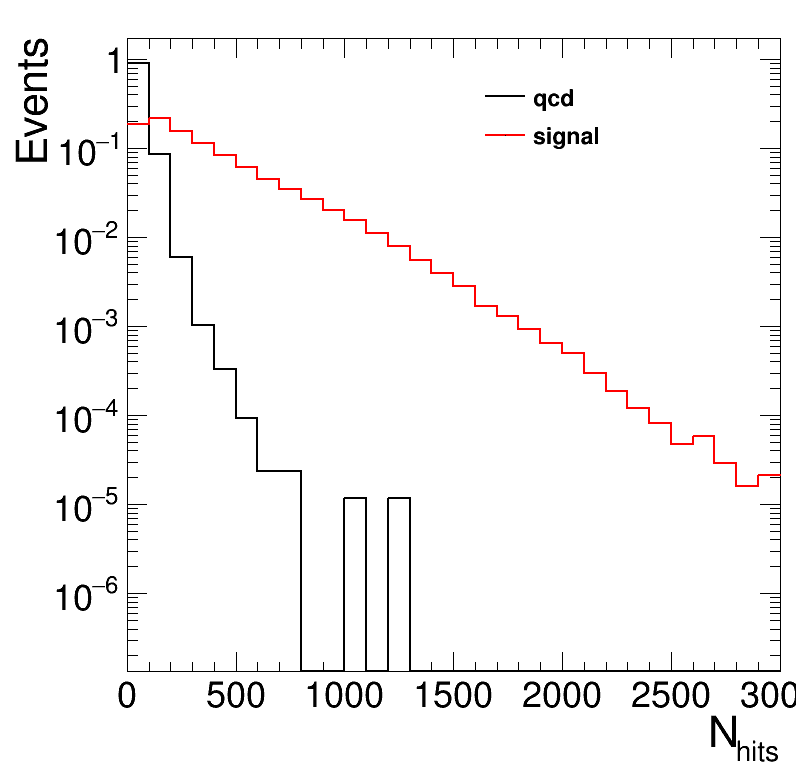

In [115]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot



start_t = time.time()
c = rt.TCanvas('c','c', 800, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.60,0.80,0.88,0.90)
leg.SetTextSize(0.032)
leg.SetBorderSize(0)
# leg.SetTextFont(42)
leg.SetEntrySeparation(0.01)
maximum = 0
for i,k in enumerate(weight.keys()):

    if '117' in path:h[k] = create_TH1D( nCsc[k], axis_title=['N_{segments}', 'Events'], name=k, binning=[30,0,100],weights = weight[k])
    else:h[k] = create_TH1D( nCsc[k], axis_title=['N_{hits}', 'Events'], name=k, binning=[30,0,3000],weights = weight[k])
        
#     h[k] = create_TH1D( nCsc[k], axis_title=['nCsc', 'Events'], name=k, binning=[30,0,300],weights = weight[k])
    if '117' in path:print(k, np.sum(weight[k][nCsc[k]>=10])/np.sum(weight[k]), np.sum(weight[k][nCsc[k]>=10])/NEvents[k])
    else:print(k, np.sum(weight[k][nCsc[k]>=250])/np.sum(weight[k]), np.sum(weight[k][nCsc[k]>=250])/NEvents[k])
    h[k].SetLineColor(i+1)
    leg.AddEntry(h[k], k)
#     leg.AddEntry(h[k+'it'], legend[k]+" in time")

    h[k].SetMinimum(0.1)


    h[k].DrawNormalized('same hist')



leg.Draw()


# if setlog: 
c.SetLogy()
c.Draw()
print(time.time()-start_t)

In [ ]:
qcd 0.034883738 0.0016681536
signal 0.737159 0.009816135

In [ ]:
segment>10
qcd 1.0 0.016092107
signal 1.0 0.00682793